In [1]:
import numpy as np
import praw
from praw.models import MoreComments
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return(score)


In [3]:
reddit = praw.Reddit(client_id='j3uScZz6iIfIRw', \
                     client_secret='8AgY4HS_hW8l759pQvFlttU1A3c', \
                     user_agent='Sentiment', \
                     username='kilejohnson', \
                     password='sxXS!&65ZyZ!&3R9YotH')

In [4]:
def comment_analyzer(submission_id):
    submission = reddit.submission(submission_id)
    submission.comments.replace_more(limit=None)
    comment_list = [comment.body for comment in submission.comments.list()]
    comment_sentiment = [sentiment_analyzer_scores(comment)['compound'] for comment in comment_list]
    return np.average(comment_sentiment)

In [5]:
print(comment_analyzer('6gkd6v'))

0.20068319088319087


In [6]:
subreddit = reddit.subreddit('Ethtrader')
top_subreddit = subreddit.top(limit=1000)

In [7]:
topics_dict = { "title":[], 
                "id":[],
                "url":[], 
               "submission_sentiment":[],
                "num_of_comms": [], 
               "comments_sentiment" : [],
                "created": [] 
              }

In [8]:
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["submission_sentiment"].append(sentiment_analyzer_scores(submission.title)['compound'])
    topics_dict["num_of_comms"].append(submission.num_comments)
    topics_dict['comments_sentiment'].append(comment_analyzer(submission.id))
    topics_dict["created"].append(submission.created)

In [9]:
topics_data = pd.DataFrame(topics_dict)

In [10]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [11]:
_timestamp = topics_data["created"].apply(get_date)

In [12]:
topics_data = topics_data.assign(timestamp = _timestamp)
topics_data = topics_data.drop('created', axis=1)

In [98]:
reddit_data = topics_data
reddit_data.DateTimeIndex = reddit_data.timestamp

In [99]:
reddit_data.head(5)

,title,id,url,submission_sentiment,num_of_comms,comments_sentiment,timestamp
timestamp,,,,,,,
2017-12-24 06:54:20,Everytime Bitcoin drops,7lusyi,https://gfycat.com/defenselessmiserableiberian...,0.0000,349,0.135494,2017-12-24 06:54:20
2018-01-16 16:16:23,Here you go,7qvmvq,https://i.redd.it/tpypv1c7xha01.jpg,0.0000,311,0.141956,2018-01-16 16:16:23
2017-06-11 04:20:21,"Welcome to r/ethtrader new people, let me save...",6gkd6v,http://i.imgur.com/RW0s5gB.gifv,0.7351,365,0.200683,2017-06-11 04:20:21
2018-01-16 03:42:16,Dips are just happy little accidents,7qr0jq,https://i.redd.it/m6jwe1ns6ea01.jpg,0.4005,212,0.103242,2018-01-16 03:42:16
2018-01-18 12:24:03,"I'm a longterm hodler, but even i hate this su...",7rba5b,https://imgur.com/jjCNiyp,-0.7227,281,0.140592,2018-01-18 12:24:03


In [100]:
reddit_data.describe()

,submission_sentiment,num_of_comms,comments_sentiment
count,988.000000,988.000000,988.000000
mean,0.075117,729.711538,0.159767
std,0.305618,1737.215455,0.090964
min,-0.935300,9.000000,-0.167769
25%,0.000000,72.000000,0.106790
50%,0.000000,124.000000,0.151311
75%,0.226300,224.500000,0.207587
max,0.915300,12740.000000,0.606284


In [103]:
reddit_data.dtypes

title                           object
id                              object
url                             object
submission_sentiment           float64
num_of_comms                     int64
comments_sentiment             float64
timestamp               datetime64[ns]
dtype: object

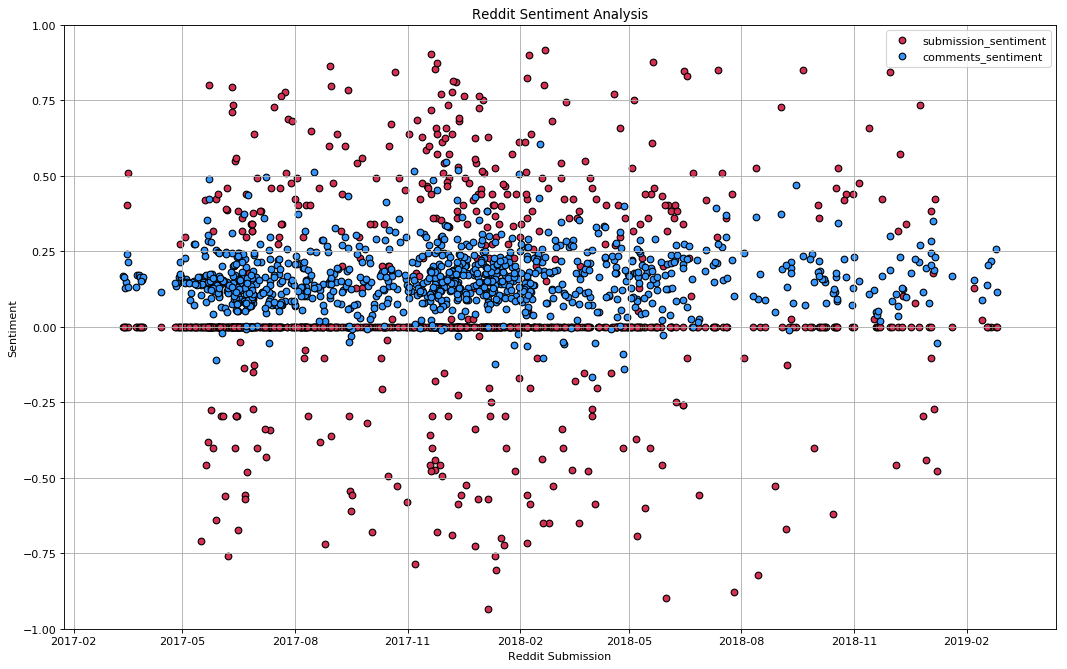

In [104]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x=reddit_data.index, y = reddit_data['submission_sentiment'], color = '#D52F52', edgecolors='black')
plt.scatter(x=reddit_data.index, y = reddit_data['comments_sentiment'], color = '#3396FF',edgecolors='black')
plt.ylim([-1, 1])
plt.grid(True)
plt.title("Reddit Sentiment Analysis")
plt.xlabel("Reddit Submission")
plt.ylabel("Sentiment")
plt.legend()
plt.show()

In [128]:
date_data = reddit_data.groupby(pd.Grouper(freq="W")).mean()
date_date = date_data.dropna()

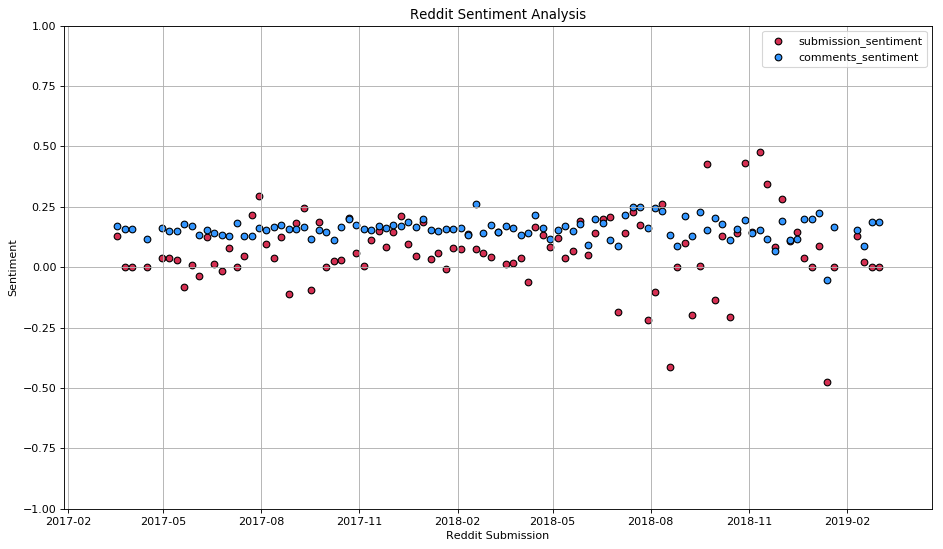

In [150]:
fig=plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x=date_data.index, y = date_data['submission_sentiment'], color = '#D52F52', edgecolors='black')
plt.scatter(x=date_data.index, y = date_data['comments_sentiment'], color = '#3396FF',edgecolors='black')
plt.ylim([-1, 1])
plt.grid(True)
plt.title("Reddit Sentiment Analysis")
plt.xlabel("Reddit Submission")
plt.ylabel("Sentiment")
plt.legend()
plt.show()

In [130]:
comments = subreddit.comments(limit=10000)

In [131]:
comment_dict = { 
                "link_id":[],
                "parent_id":[],
                "url":[], 
                "created": [], 
                "body":[],               
                "neg":[],
                  "neu":[],
                  "pos":[],
                    "compound":[]}

In [132]:
for comment in comments:
    comment_dict['link_id'].append(comment.link_id)
    comment_dict['parent_id'].append(comment.parent_id)
    comment_dict['url'].append(comment.link_url)
    comment_dict['created'].append(comment.created)
    comment_dict['body'].append(comment.body)
    comment_dict['neg'].append(sentiment_analyzer_scores(comment.body)['neg'])
    comment_dict['neu'].append(sentiment_analyzer_scores(comment.body)['neu'])
    comment_dict['pos'].append(sentiment_analyzer_scores(comment.body)['pos'])
    comment_dict['compound'].append(sentiment_analyzer_scores(comment.body)['compound'])

In [133]:
comment_data = pd.DataFrame(comment_dict)
comment_data = comment_data.assign(timestamp = _timestamp)
comment_data = comment_data.drop('created', axis=1)
comment_data.tail()


,link_id,parent_id,url,body,neg,neu,pos,compound,timestamp
983,t3_axhrgj,t1_ehvq17r,https://www.reddit.com/r/ethtrader/comments/ax...,But Bitcoin is taking a nosedive,0.0,1.000,0.000,0.0000,2018-08-20 07:31:58
984,t3_axqm45,t1_ehve1kq,https://i.redd.it/7sv49wt4edk21.jpg,You've never seen a forex chart? Daily range f...,0.0,1.000,0.000,0.0000,2018-04-12 02:12:16
985,t3_axqm45,t3_axqm45,https://i.redd.it/7sv49wt4edk21.jpg,"Eh. Its pegged to fiat tho, so the value is er...",0.0,0.723,0.277,0.7703,2017-11-27 19:48:16
986,t3_axqm45,t1_ehvszns,https://i.redd.it/7sv49wt4edk21.jpg,what are the pink blobs?,0.0,1.000,0.000,0.0000,2017-11-17 13:14:21
987,t3_axq2ki,t1_ehvpx69,https://i.redd.it/2cdqqivl5dk21.jpg,r/technicallythetruth,0.0,1.000,0.000,0.0000,2017-07-07 16:42:05


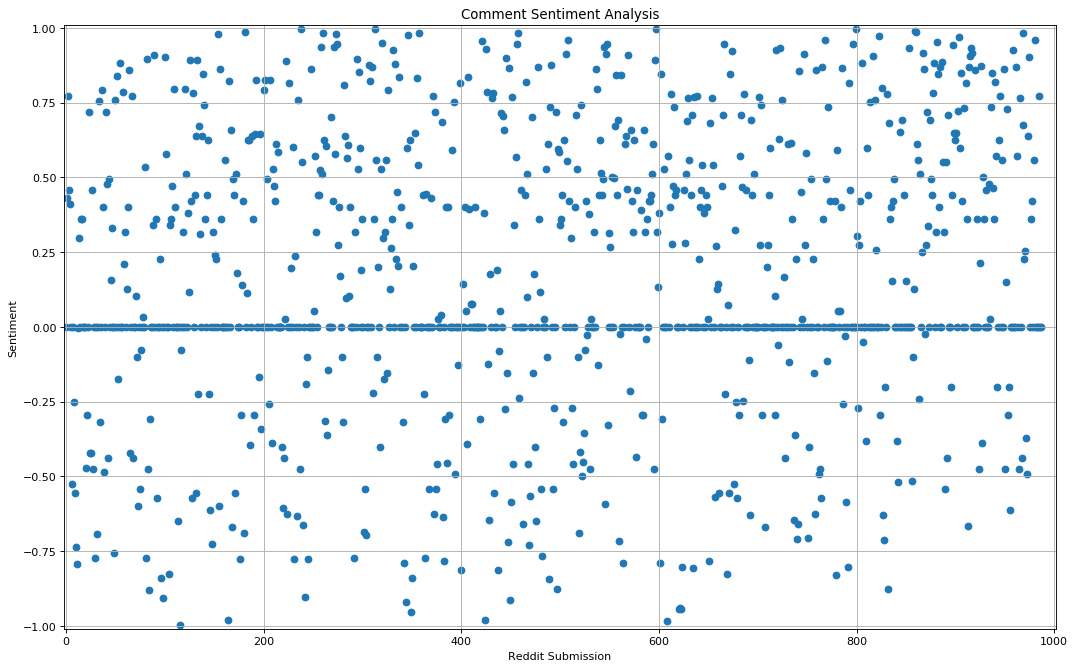

In [145]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x=comment_data.index, y = comment_data['compound'])
plt.xlim([-2, 1002])
plt.ylim([-1.01, 1.01])
plt.grid(True)
plt.title("Comment Sentiment Analysis")
plt.xlabel("Reddit Submission")
plt.ylabel("Sentiment")
plt.show()

In [146]:
def word_cloud(comment):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in comment])
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        width = 1600,
        height = 800,
        random_state = 21,
        colormap = 'jet',
        max_words = 50,
        max_font_size=200).generate(all_words)
 
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show();      
    

In [147]:
def word_list(df):
    wrd_list = []
    for row in df.itertuples():
        wrd_list.append(row.body)
    return wrd_list
    

In [148]:
reddit_comments = word_list(comment_data)

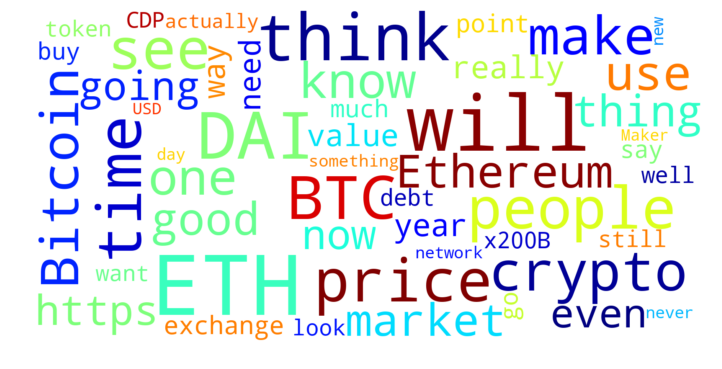

In [149]:
word_cloud(reddit_comments)